<a href="https://colab.research.google.com/github/Nesmsaziz/project_AI2/blob/main/PROJECT_AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Tweets.csv", encoding='latin-1')

df.head()

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [ ]:
COLUMNS_TO_KEEP = [
    'airline_sentiment',
    'text',
    'airline',
    'negativereason'
]


COLUMNS_TO_DROP = [col for col in df.columns if col not in COLUMNS_TO_KEEP]
df_processed = df.drop(columns=COLUMNS_TO_DROP)

print("\n Shape:", df_processed.shape )
print("\n")
df_processed.head(10)


 Shape: (14640, 4)




,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...
5,negative,Can't Tell,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
6,positive,NaN,Virgin America,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,NaN,Virgin America,@VirginAmerica Really missed a prime opportuni...
8,positive,NaN,Virgin America,"@virginamerica Well, I didn'tâ¦but NOW I DO! :-D"
9,positive,NaN,Virgin America,"@VirginAmerica it was amazing, and arrived an ..."


In [ ]:
df_processed['negativereason'] =df_processed['negativereason'].fillna('None')

In [ ]:
df_processed["negativereason"].head(10)

,negativereason
0,None
1,None
2,None
3,Bad Flight
4,Can't Tell
5,Can't Tell
6,None
7,None
8,None
9,None


# **Barplot**

In [ ]:
sentiment_counts = df_processed['airline_sentiment'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

plt.title('Distribution of airline tweets', fontsize=16)
plt.xlabel('Feelings', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count + 300, f'{count}', ha='center', fontsize=11)

plt.show()

print("\nDistribution of emotions as a percentage:")
print(df['airline_sentiment'].value_counts(normalize=True) * 100)

NameError: name 'df_processed' is not defined

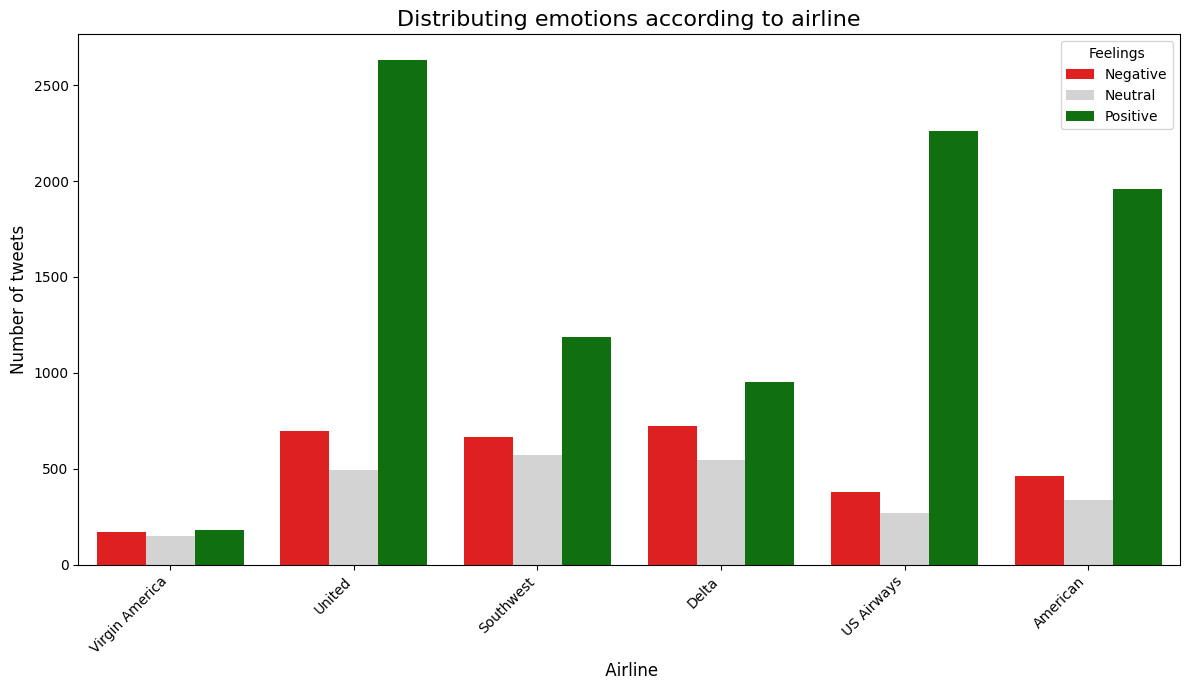

In [ ]:
plt.figure(figsize=(12, 7))

sns.countplot(data=df_processed, x='airline', hue='airline_sentiment', palette=['red', 'lightgray', 'green'])

plt.title('Distributing emotions according to airline', fontsize=16)
plt.xlabel(' Airline', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.legend(title='Feelings', labels=['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

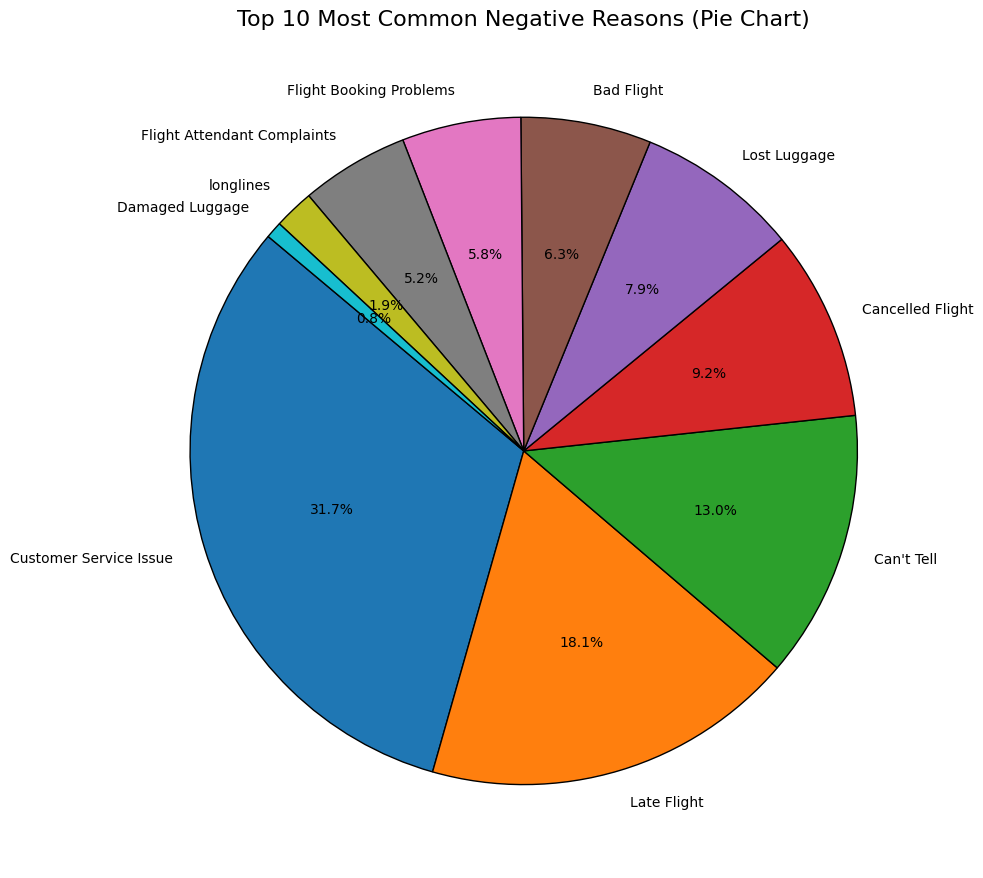

In [ ]:

negative_df = df[df['airline_sentiment'] == 'negative']

negative_reasons = negative_df['negativereason'].value_counts().head(10)

plt.figure(figsize=(10, 10))
plt.pie(
    negative_reasons.values,
    labels=negative_reasons.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Top 10 Most Common Negative Reasons (Pie Chart)', fontsize=16)
plt.tight_layout()
plt.show()


# Clean & Preprocess Text

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)
    words = []
    for w in tokens:
        if w not in stop_words:
            words.append(lemma.lemmatize(w))

    return " ".join(words)


df_processed['clean_text'] = df_processed['text'].apply(clean_text)
df_processed[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,clean_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


In [ ]:
df_processed.head()

,airline_sentiment,negativereason,airline,text,clean_text
0,neutral,None,Virgin America,@VirginAmerica What @dhepburn said.,said
1,positive,None,Virgin America,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky
2,neutral,None,Virgin America,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,really big bad thing


In [ ]:
df_processed = df_processed.drop_duplicates(subset=['clean_text'], keep='first')

In [ ]:
df_processed['clean_text'].duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **Split Data (Train & Test)**

In [ ]:
X = df_processed["clean_text"]
y = df_processed["airline_sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **Transform Text → TF-IDF**

In [ ]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=2,
    stop_words='english'
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

# Train the Model (LogisticRegression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_tfidf, y_train)
log_preds = log_model.predict(X_test_tfidf)


print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))

Logistic Regression Accuracy: 0.7824848700605198
              precision    recall  f1-score   support

    negative       0.81      0.93      0.86      1857
     neutral       0.62      0.41      0.50       550
    positive       0.82      0.58      0.68       402

    accuracy                           0.78      2809
   macro avg       0.75      0.64      0.68      2809
weighted avg       0.77      0.78      0.77      2809



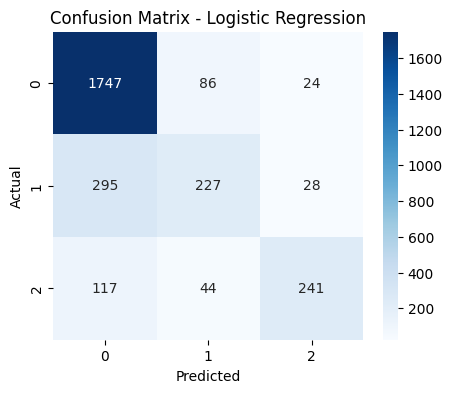

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

cm_lr = confusion_matrix(y_test, log_preds)
plot_confusion(cm_lr, "Confusion Matrix - Logistic Regression")

# Train the Model(Naive Bayes Model)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))

Naive Bayes Accuracy: 0.7440370238519046
              precision    recall  f1-score   support

    negative       0.74      0.98      0.84      1857
     neutral       0.70      0.24      0.36       550
    positive       0.87      0.36      0.51       402

    accuracy                           0.74      2809
   macro avg       0.77      0.53      0.57      2809
weighted avg       0.75      0.74      0.70      2809



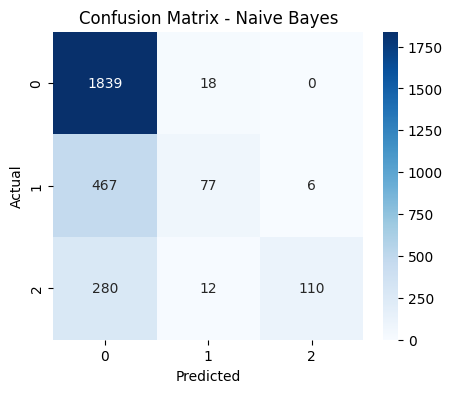

In [ ]:

cm_nb = confusion_matrix(y_test, nb_preds)
plot_confusion(cm_nb, "Confusion Matrix - Naive Bayes")

# Train the Model(SVM Model)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

SVM Accuracy: 0.7707369170523318
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      1857
     neutral       0.54      0.50      0.52       550
    positive       0.73      0.64      0.68       402

    accuracy                           0.77      2809
   macro avg       0.70      0.67      0.69      2809
weighted avg       0.76      0.77      0.77      2809



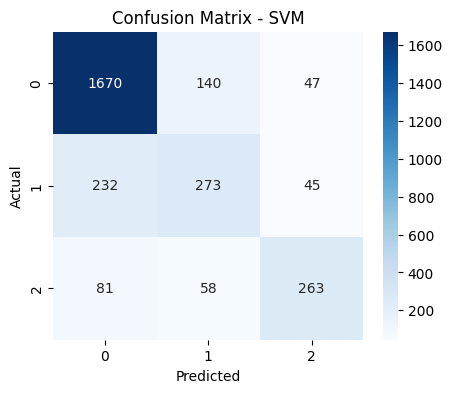

In [ ]:
cm_svm = confusion_matrix(y_test, svm_preds)
plot_confusion(cm_svm, "Confusion Matrix - SVM")

In [ ]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    prediction =log_model.predict(vectorized)[0]
    return prediction

predict_sentiment("I am very happy")

'positive'